In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image = "advertisement image.jpg"
video = "input video.mp4"
foreground_path = "advertisement image.jpg"
foreground = cv2.imread(foreground_path)
cap = cv2.VideoCapture('input video.mp4')

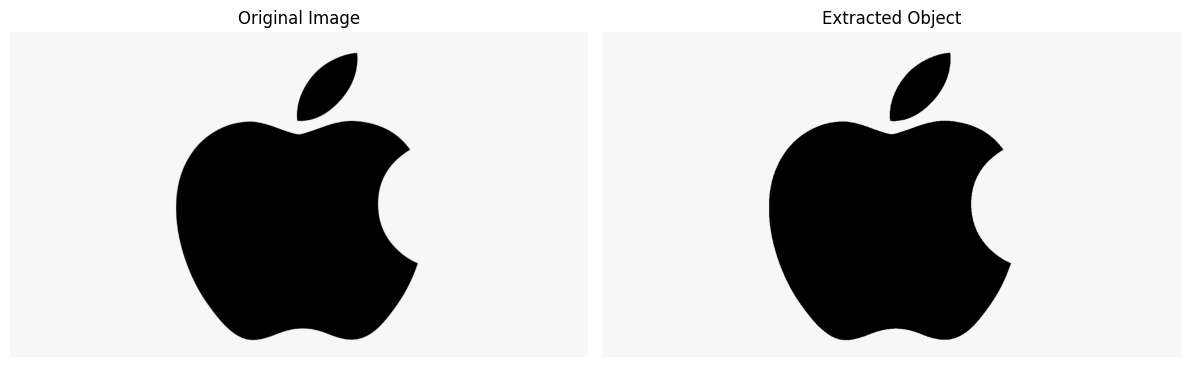

Image Resolution: Width = 1600, Height = 900, Channels = 3


In [ ]:
# Load the image
image = cv2.imread(image)  # Replace with the path to your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Perform thresholding to create a binary mask (adjust threshold values as needed)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Apply the mask to the original image to extract the object
extracted_object = cv2.bitwise_and(image, image, mask=thresh)

# Display the original image and the extracted object using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(extracted_object)
axes[1].set_title('Extracted Object')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Get the resolution of the image
height, width, channels = image.shape

print(f"Image Resolution: Width = {width}, Height = {height}, Channels = {channels}")


In [ ]:

import os

In [ ]:
def detect_hand(video_path, output_path, base_hand_level=0.3, image_scale=0.7):

    haar_cascade_path = os.path.abspath('haarcascade_hand.xml')

    hand_cascade = cv2.CascadeClassifier(haar_cascade_path)

    top_left_y = 600
    top_left_x = 120

    # Get video properties
    video = cv2.VideoCapture(video_path)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv2.CAP_PROP_FPS)

    # Define VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = video.read()

        if not ret:
            break

        # Convert the frame to grayscale for hand detection
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect hands using the cascade classifier
        hands = hand_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(hands) > 0:
            # Assuming only one hand is detected, take the first hand
            x, y, w, h = hands[0]

            # Check if the hand is above a certain level
            if y < base_hand_level * height:
                # Move the image when the hand is above the specified level
                top_left_y = max(0, y - int(image_scale * height))


            resized_image = cv2.resize(image, (int(image_scale * w), int(image_scale * h)))


            alpha_channel = cv2.resize(resized_image[:, :, 2], (resized_image.shape[1], resized_image.shape[0])) / 255.0
            frame[top_left_y:top_left_y + resized_image.shape[0], top_left_x:top_left_x + resized_image.shape[1]] = (
                    (1 - alpha_channel)[:, :, np.newaxis] * frame[top_left_y:top_left_y + resized_image.shape[0], top_left_x:top_left_x + resized_image.shape[1]]
                    + alpha_channel[:, :, np.newaxis] * resized_image[:, :, :3]
            )

        out_writer.write(frame)

        cv2_imshow( frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    video.release()
    out_writer.release()
    cv2.destroyAllWindows()

video_path = "input video.mp4"
output_path = "output_video_with_logo.mp4"

detect_hand(video_path, output_path)
